# Time Series Data

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Fetch historical stock price data for Apple Inc. (AAPL) using yfinance library
stock_data = yf.download('AAPL', start='2024-01-01')
stock_data.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222336,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495071,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500
2024-01-09,183.919998,185.149994,182.729996,185.139999,184.440109,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,185.486145,46792900
2024-01-11,186.539993,187.050003,183.619995,185.589996,184.888412,49128400
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.217163,40444700


# Time Series Analysis

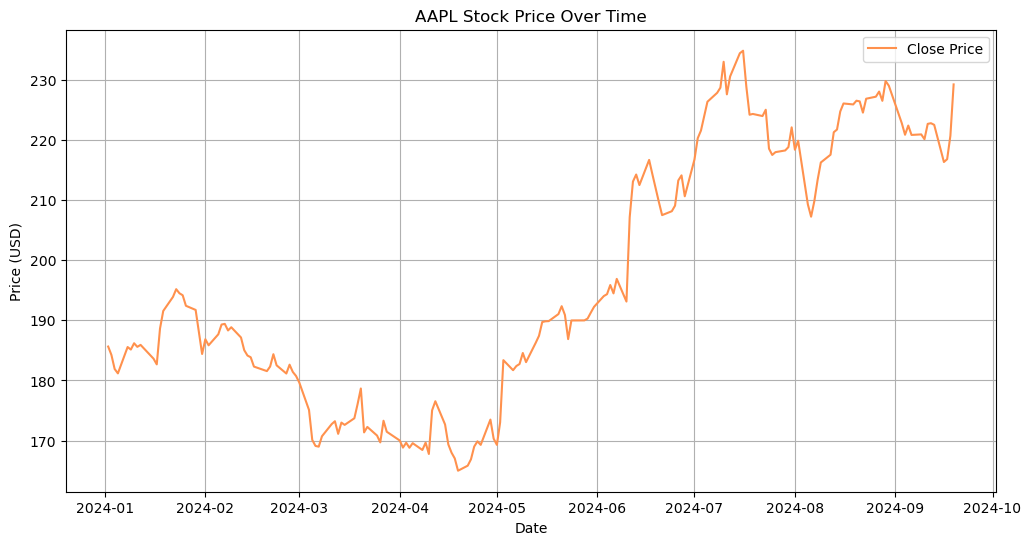

In [2]:
# Plotting the closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color = '#FF914D')
plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

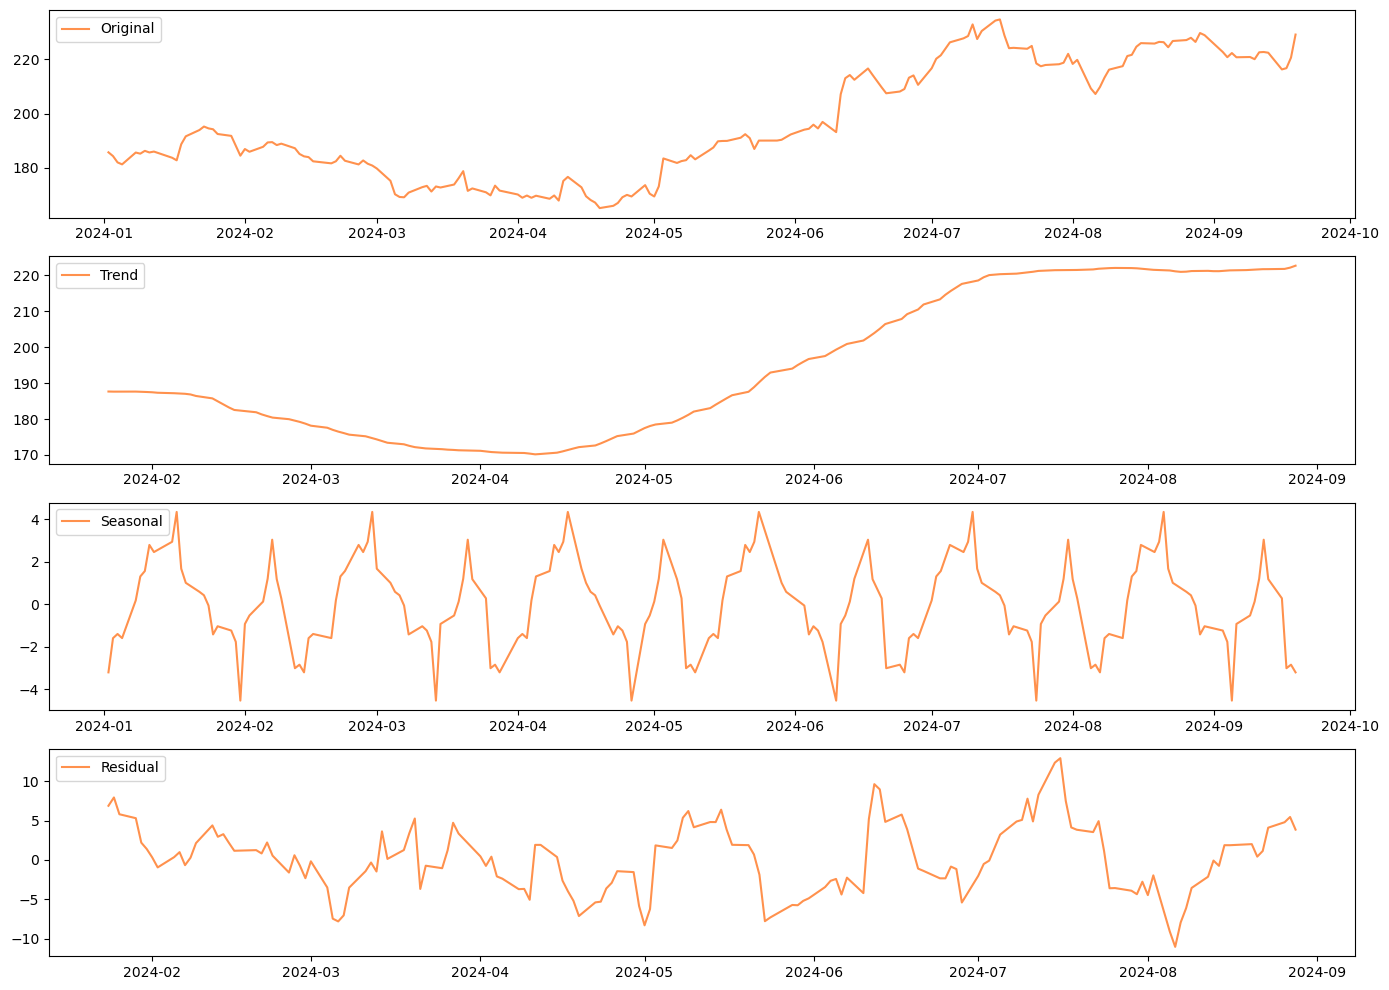

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series using additive decomposition
# for multiplicative relationship use model = "multiplicative"
# period can be changed on the observed data
decomposition_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)  
trend_additive = decomposition_additive.trend
seasonal_additive = decomposition_additive.seasonal
residual_additive = decomposition_additive.resid

# Plotting the additive decomposition
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend_additive, label='Trend', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonal', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual_additive, label='Residual', color = '#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# STL Time Series Decomposition

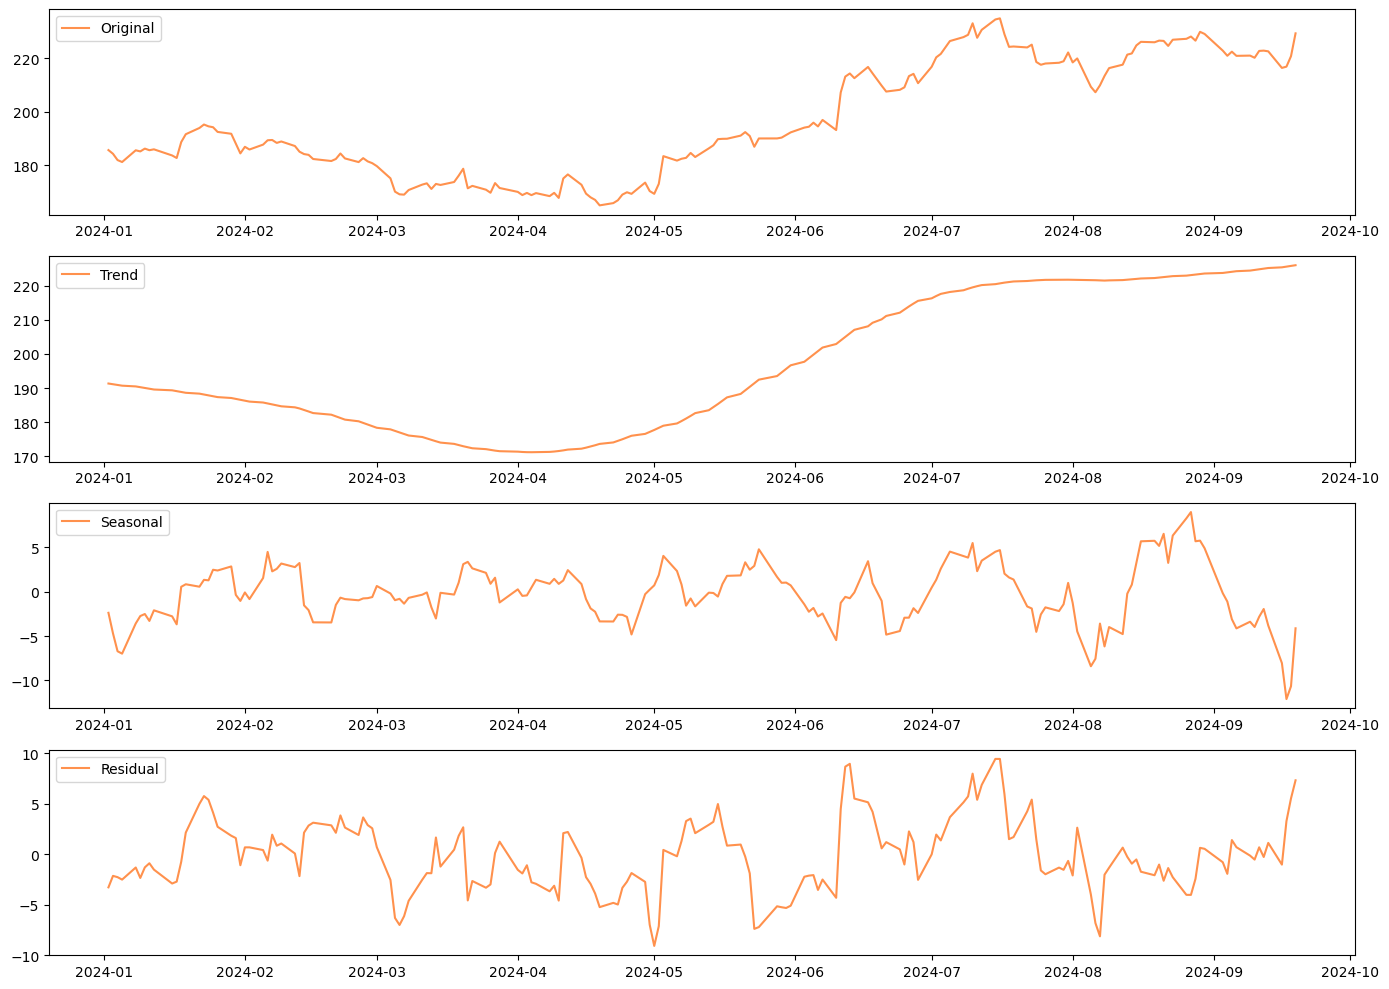

In [4]:
from statsmodels.tsa.seasonal import STL


# Perform STL decomposition
stl = STL(stock_data['Close'], period=30) 
result = stl.fit()

# Plot the decomposition components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result.observed, label='Original', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color = '#FF914D')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color = '#FF914D')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


# Stationarity

In [5]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(stock_data['Close'])

print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0],3)}')
print(f'p-value: {round(adf_test[1],3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {round(value,3)}')


ADF Test Results:
ADF Statistic: -0.378
p-value: 0.914
Critical Values:
   1%: -3.467
   5%: -2.878
   10%: -2.575


**Null Hypothesis (H0):** The time series has a unit root (non-stationary). 

**Alternative Hypothesis (H1):** The time series is stationary.

- The ADF statistic is positive and very close to zero.

- The p-value is extremely high (0.9658), which is much greater than any typical significance level.

- The ADF statistic is significantly greater than all critical values.

Therefore, we fail to reject the null hypothesis. 

In [6]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
kpss_test = kpss(stock_data['Close'], regression='ct')  # 'c' for constant (level stationarity), 'ct' for trend

print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0],2)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'   {key}: {value}')


KPSS Test Results:
KPSS Statistic: 0.32
p-value: 0.01
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216


/var/folders/7p/9fzd376x7ll_q2md42x9_71c0000gn/T/ipykernel_93286/3039000446.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_data['Close'], regression='ct')  # 'c' for constant (level stationarity), 'ct' for trend


**Null Hypothesis (H0):**  The time series is stationary.

**Alternative Hypothesis (H1):** The time series is non-stationary.

- The KPSS statistic is significantly larger than all critical values.

- The p-value is very low (0.01), which is less than any typical significance level.
  
Therefore, we reject the null hypothesis. This means there is strong evidence to suggest that the time series is non-stationary.

# Kolmogorov-Smirnov (K-S) test

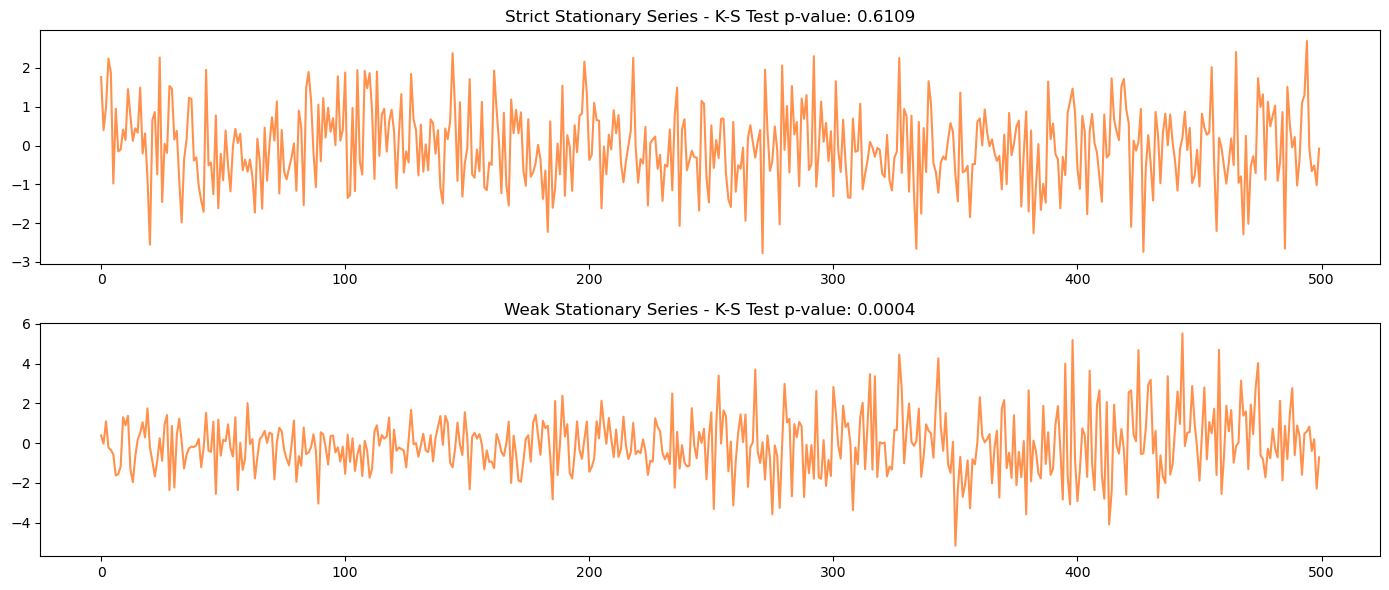

Strict Stationary Series - K-S Test Statistic: 0.068, p-value: 0.6109
Weak Stationary Series - K-S Test Statistic: 0.184, p-value: 0.0004


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, ks_2samp

# Generating synthetic data for demonstration
np.random.seed(0)
n = 500

# Strictly stationary series: normally distributed random noise
strict_stationary_series = np.random.normal(0, 1, n)

# Non-strictly stationary series: changing variance
non_strict_stationary_series = np.concatenate([
    np.random.normal(0, 1, n // 2),
    np.random.normal(0, 2, n // 2)
])

# Function to split the series into two halves and perform the K-S test
def ks_test_stationarity(series):
    split = len(series) // 2
    series_first_half = series[:split]
    series_second_half = series[split:]
    stat, p_value = ks_2samp(series_first_half, series_second_half)
    return stat, p_value

# Perform the K-S test on strictly stationary series
ks_stat_strict, ks_pvalue_strict = ks_test_stationarity(strict_stationary_series)

# Perform the K-S test on non-strictly stationary series
ks_stat_non_strict, ks_pvalue_non_strict = ks_test_stationarity(non_strict_stationary_series)

# Plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(strict_stationary_series, color = '#FF914D')
plt.title(f'Strict Stationary Series - K-S Test p-value: {ks_pvalue_strict:.4f}')

plt.subplot(2, 1, 2)
plt.plot(non_strict_stationary_series, color = '#FF914D')
plt.title(f'Weak Stationary Series - K-S Test p-value: {ks_pvalue_non_strict:.4f}')

plt.tight_layout()
plt.show()

print(f'Strict Stationary Series - K-S Test Statistic: {ks_stat_strict}, p-value: {ks_pvalue_strict:.4f}')
print(f'Weak Stationary Series - K-S Test Statistic: {ks_stat_non_strict}, p-value: {ks_pvalue_non_strict:.4f}')


A very low p-value (0.0004) strongly suggests that the empirical distribution of the series is significantly different from the theoretical distribution. This indicates that the series is likely not stationary in terms of its distribution.

A high p-value (0.6109) suggests that there is no significant difference between the empirical cumulative distribution function of the series and the theoretical distribution. This indicates that the series might be stationary in terms of its distribution.



# Making data stationary

In [8]:
# Performing ADF and KPSS tests
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Value (%s): %.3f' % (key, value))

def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print('Critical Value (%s): %.3f' % (key, value))

1. Differencing

In [9]:
# differencing with previous series
stock_data['Close'].diff()

Date
2024-01-02         NaN
2024-01-03   -1.389999
2024-01-04   -2.339996
2024-01-05   -0.730011
2024-01-08    4.380005
                ...   
2024-09-13   -0.270004
2024-09-16   -6.179993
2024-09-17    0.469986
2024-09-18    3.900009
2024-09-19    8.529999
Name: Close, Length: 181, dtype: float64

2. Transformation

In [10]:
import numpy as np
from scipy import stats

prices = stock_data['Close']

# Log transformation
prices_log = np.log(prices)

# Square root transformation
prices_sqrt = np.sqrt(prices)

# Box-Cox transformation
# Note: Box-Cox requires all positive values
prices_boxcox, lam = stats.boxcox(prices[prices > 0])


3. De-trending

In [11]:
from scipy import signal

# Using a linear trend
trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
prices_detrended = prices - trendline


In [12]:
# Using a moving average to remove trend
window = 12  # example window size
prices_ma = prices.rolling(window=window).mean()
prices_detrended = prices - prices_ma
prices_detrended = prices_detrended.dropna()


4. Seasonal adjustment

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition using moving averages
decomposition = seasonal_decompose(prices, model='additive', period=30)
prices_adjusted = prices / decomposition.seasonal
prices_adjusted = prices_adjusted.dropna()


# Random Walk and White Noise

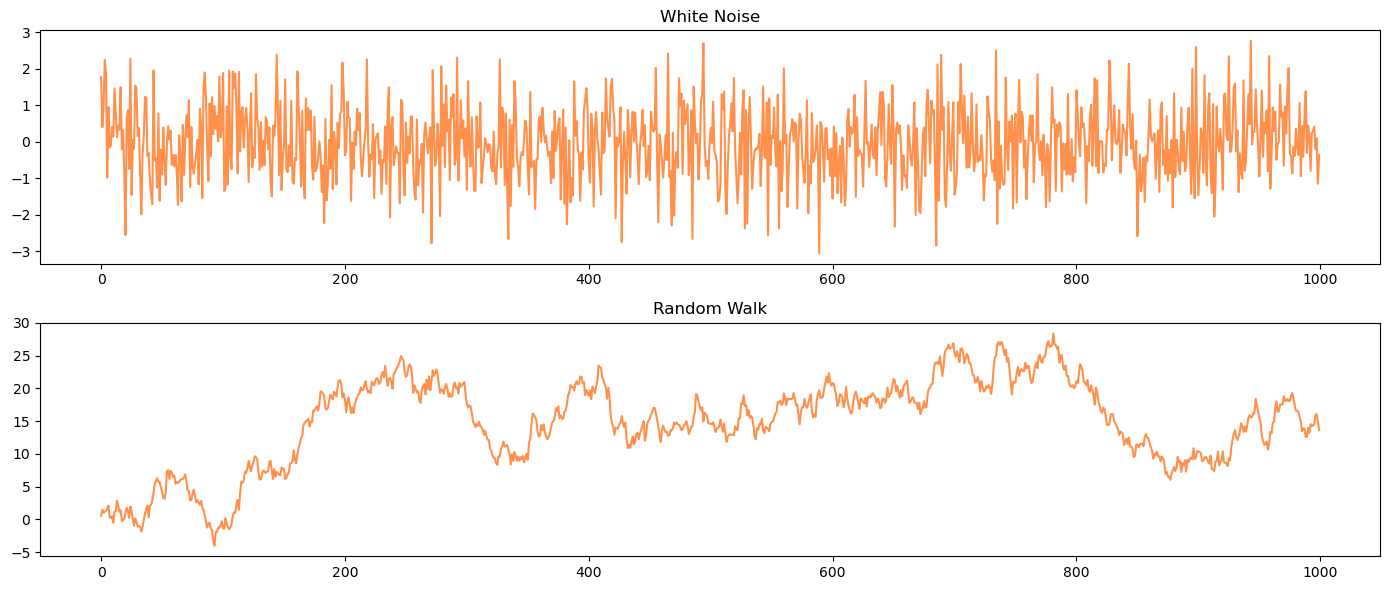


ADF Test for White Noise:
ADF Statistic: -32.462559337689974
p-value: 0.0
Critical Value (1%): -3.437
Critical Value (5%): -2.864
Critical Value (10%): -2.568

KPSS Test for White Noise:
KPSS Statistic: 0.23806270020371642
p-value: 0.1
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739

ADF Test for Random Walk:
ADF Statistic: -2.79787305269428
p-value: 0.05857823023908064
Critical Value (1%): -3.437
Critical Value (5%): -2.864
Critical Value (10%): -2.568

KPSS Test for Random Walk:
KPSS Statistic: 1.2935550026767026
p-value: 0.01
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739

Ljung-Box Test for White Noise:
      lb_stat  lb_pvalue
10  14.025574   0.171828

Ljung-Box Test for Random Walk:
        lb_stat  lb_pvalue
10  8828.660312        0.0


/var/folders/7p/9fzd376x7ll_q2md42x9_71c0000gn/T/ipykernel_93286/2774983209.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')
/var/folders/7p/9fzd376x7ll_q2md42x9_71c0000gn/T/ipykernel_93286/2774983209.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

# Generating white noise and random walk for comparison
np.random.seed(0)
n = 1000

# White Noise
white_noise = np.random.normal(0, 1, n)

# Random Walk
random_shocks = np.random.normal(0, 1, n)
random_walk = np.cumsum(random_shocks)

# Plotting the series
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(white_noise, color = '#FF914D')
plt.title(f'White Noise')

plt.subplot(2, 1, 2)
plt.plot(random_walk, color = '#FF914D')
plt.title(f'Random Walk')

plt.tight_layout()
plt.show()

print("\nADF Test for White Noise:")
adf_test(white_noise)
print("\nKPSS Test for White Noise:")
kpss_test(white_noise)

print("\nADF Test for Random Walk:")
adf_test(random_walk)
print("\nKPSS Test for Random Walk:")
kpss_test(random_walk)

# Ljung-Box test
print("\nLjung-Box Test for White Noise:")
lb_test_white_noise = acorr_ljungbox(white_noise, lags=[10], return_df=True)
print(lb_test_white_noise)

print("\nLjung-Box Test for Random Walk:")
lb_test_random_walk = acorr_ljungbox(random_walk, lags=[10], return_df=True)
print(lb_test_random_walk)


**Null Hypothesis (H0):**  There is no autocorrelation between series and its lagged version.

**Alternative Hypothesis (H1):** There is autocorrelation between series and its lagged version.

If the p-value of Ljung-Box Test is less than the significance value, we reject the null hypothesis of no autocorrelation.

In [15]:
# testing on apple stock
acorr_ljungbox(stock_data['Close'], lags=[10], return_df=True)


,lb_stat,lb_pvalue
10,1583.497383,0.0


p-value is less than 0.05, so we can say that there is autocorrelation in data means the data is a random walk.

# Time Series Forecasting Models


# AR Model

In [16]:
# making data stationary before model fitting
stock_data = yf.download('AAPL', start='2023-01-01')

apple_price_stationary = stock_data['Close'].diff().dropna()

# Split the data into training and testing datasets
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]


[*********************100%%**********************]  1 of 1 completed


In [17]:
len(train_data)

399

In [18]:
len(train_data) + len(test_data)-1

428

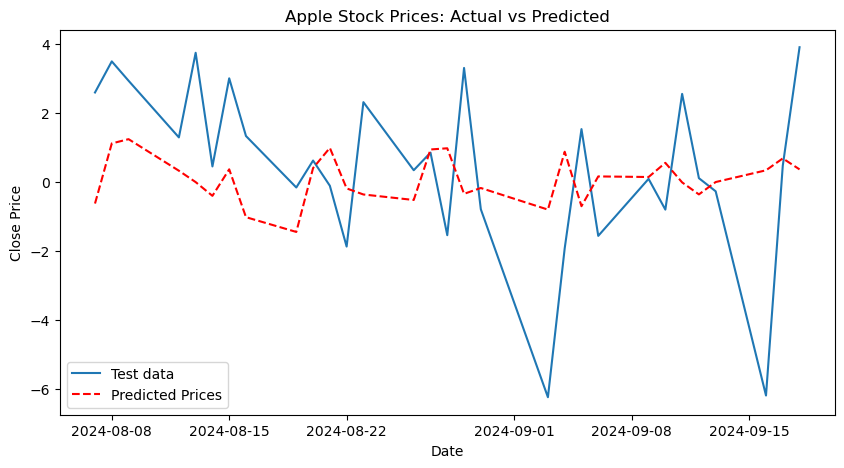

RMSE:  2.51


In [19]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE: ',rmse)

# MA Model

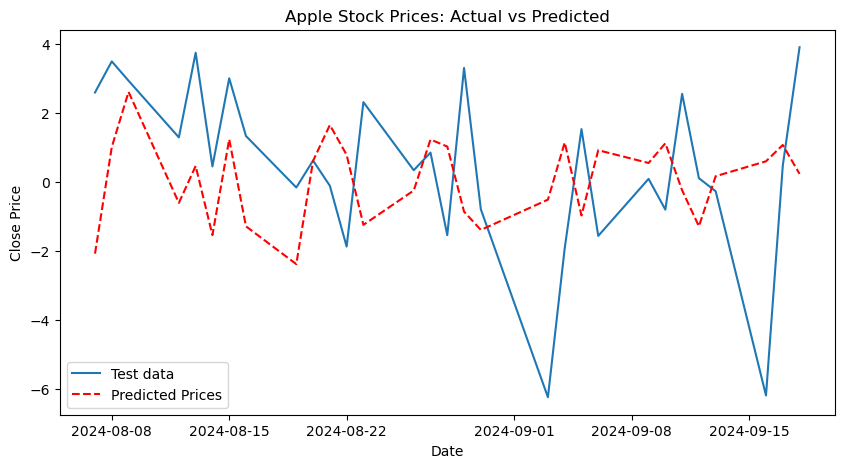

RMSE:  2.81


In [20]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the Moving Average (MA) model to the training data
model = ARIMA(train_data, order=(0,0,30))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE: ',rmse)

# ARMA Model

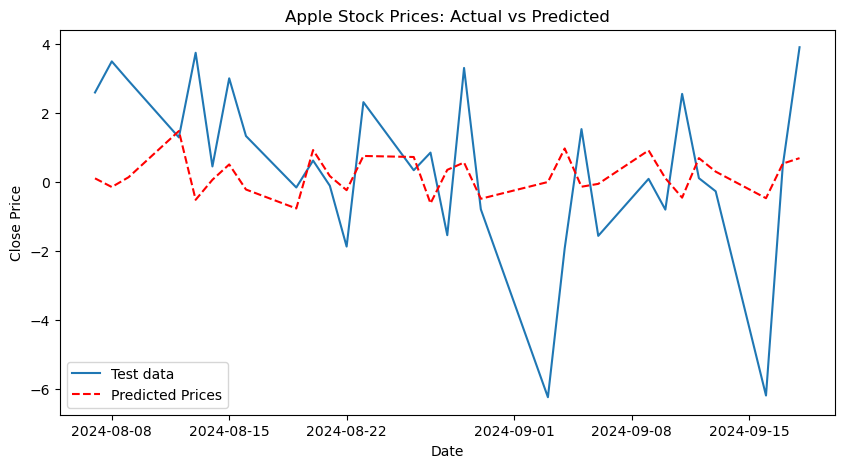

RMSE:  2.45


In [21]:

model = ARIMA(train_data, order=(7,0,7))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE: ',rmse)

# ARIMA Model

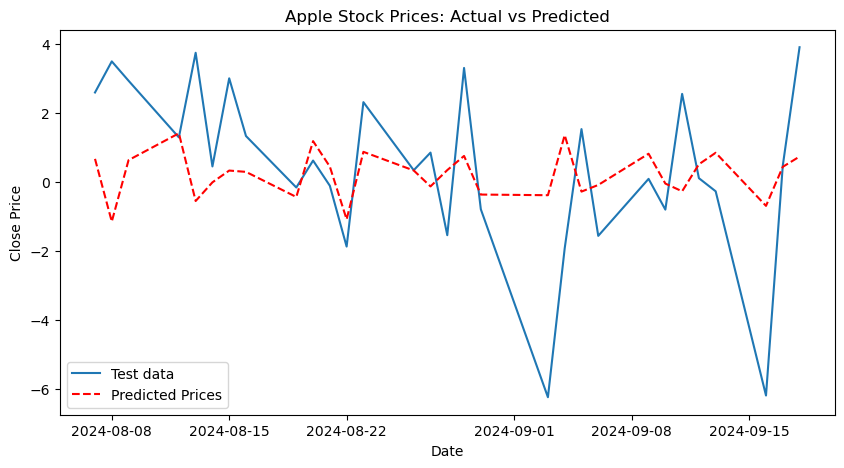

RMSE:  2.4


In [22]:

# Fit the Moving Average (MA) model to the training data
model = ARIMA(train_data, order=(7,1,7))
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE: ',rmse)

# SARIMA Model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59148D+00    |proj g|=  6.09385D-01


 This problem is unconstrained.



At iterate    5    f=  2.25781D+00    |proj g|=  5.92021D-02

At iterate   10    f=  2.23098D+00    |proj g|=  5.87837D-02

At iterate   15    f=  2.21078D+00    |proj g|=  4.54760D-02

At iterate   20    f=  2.19732D+00    |proj g|=  2.24269D-02

At iterate   25    f=  2.19209D+00    |proj g|=  1.10348D-02

At iterate   30    f=  2.19143D+00    |proj g|=  3.33110D-02

At iterate   35    f=  2.19058D+00    |proj g|=  3.12321D-02

At iterate   40    f=  2.18550D+00    |proj g|=  4.87397D-02

At iterate   45    f=  2.18414D+00    |proj g|=  3.16800D-02

At iterate   50    f=  2.18181D+00    |proj g|=  8.86104D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

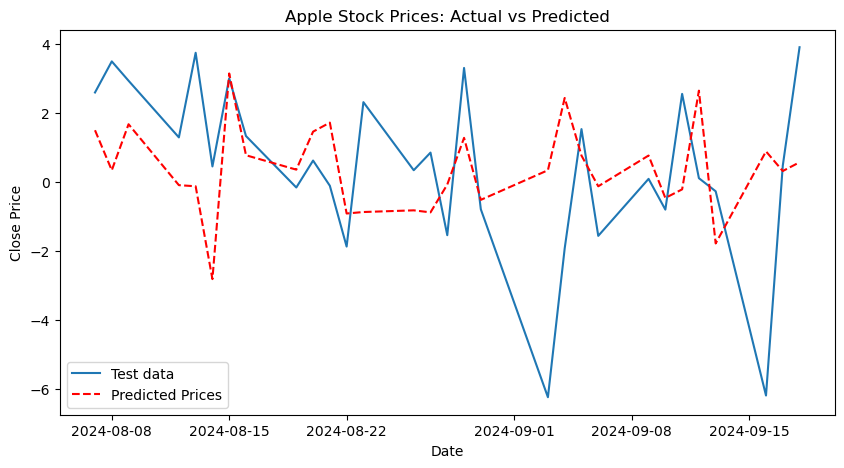

RMSE:  2.64


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

p, d, q = 7, 1, 7
P, D, Q, s = 1, 1, 1, 45  
  
# Fit the SARIMA model 
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s)) 
model_fit = model.fit() 

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Test data')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted Prices')
plt.title('Apple Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)),2)
print('RMSE: ',rmse)

# Vector Models

In [24]:

tsla_data = yf.download('TSLA', start='2023-01-01')

stock_data['TSLA_Close'] = tsla_data['Close']
stock_data['APPL_Close'] = stock_data['Close'].shift()
stock_data.dropna(inplace=True)

from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(stock_data[['APPL_Close', 'TSLA_Close']].dropna(), maxlag=[14])
print()

[*********************100%%**********************]  1 of 1 completed


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=6.2806  , p=0.0000  , df_denom=386, df_num=14
ssr based chi2 test:   chi2=94.5341 , p=0.0000  , df=14
likelihood ratio test: chi2=85.1656 , p=0.0000  , df=14
parameter F test:         F=6.2806  , p=0.0000  , df_denom=386, df_num=14



In [25]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,TSLA_Close,APPL_Close
Date,,,,,,,,
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,113.639999,125.070000
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,80962700,110.339996,126.360001
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412231,87754700,113.059998,125.019997
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937302,70790800,119.769997,129.619995
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511902,63896200,118.849998,130.149994
...,...,...,...,...,...,...,...,...
2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200,229.809998,222.660004
2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600,230.289993,222.770004
2024-09-16,216.539993,217.220001,213.919998,216.320007,216.320007,59357400,226.779999,222.500000


In [26]:
tsla_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000
...,...,...,...,...,...,...
2024-09-13,228.000000,232.669998,226.320007,230.289993,230.289993,59515100
2024-09-16,229.300003,229.960007,223.529999,226.779999,226.779999,54323000
2024-09-17,229.449997,234.570007,226.550003,227.869995,227.869995,66761600


In [27]:

data = stock_data[['APPL_Close','TSLA_Close']].diff().dropna()
train_data, test_data = data[:-14], data[-14:]

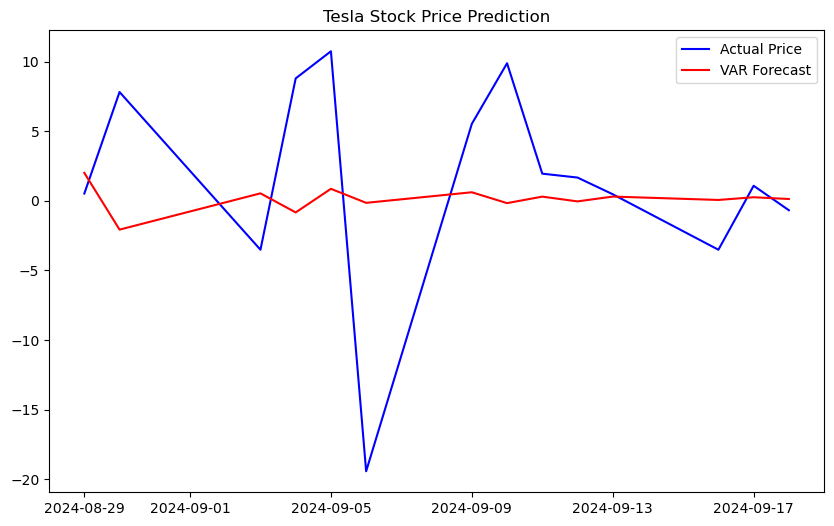

RMSE:  7.68


In [28]:
from statsmodels.tsa.api import VAR, VARMAX

# VAR
model = VAR(train_data)
result = model.fit(maxlags=7)
predictions = result.forecast(train_data.values[-result.k_ar:], steps=len(test_data))

predictions = pd.DataFrame(predictions, index=test_data.index, columns=test_data.columns)
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VAR Forecast', color='red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])),2)
print('RMSE: ',rmse)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           61     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68186D+00    |proj g|=  1.23184D+00


 This problem is unconstrained.



At iterate    5    f=  5.56664D+00    |proj g|=  8.07533D-02

At iterate   10    f=  5.56264D+00    |proj g|=  1.37834D-02

At iterate   15    f=  5.56193D+00    |proj g|=  7.98684D-03

At iterate   20    f=  5.56104D+00    |proj g|=  8.59731D-03

At iterate   25    f=  5.56069D+00    |proj g|=  4.97067D-03

At iterate   30    f=  5.56059D+00    |proj g|=  6.97236D-03

At iterate   35    f=  5.56051D+00    |proj g|=  2.36749D-03

At iterate   40    f=  5.56049D+00    |proj g|=  6.68001D-04

At iterate   45    f=  5.56048D+00    |proj g|=  1.27066D-03

At iterate   50    f=  5.56048D+00    |proj g|=  6.63836D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

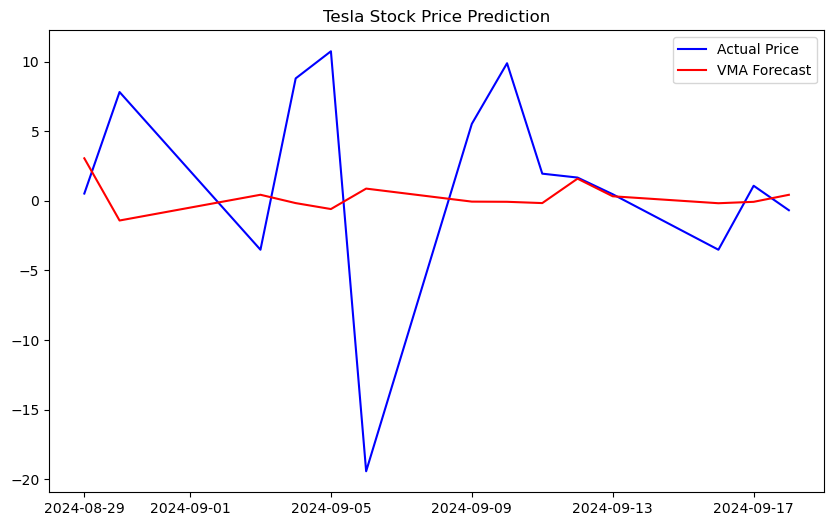

RMSE:  7.92


In [29]:
# VMA
model = VARMAX(train_data, order = (0,14))
result = model.fit()
predictions = result.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VMA Forecast', color='red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])),2)
print('RMSE: ',rmse)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          117     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56466D+00    |proj g|=  7.98926D-02


 This problem is unconstrained.



At iterate    5    f=  5.55489D+00    |proj g|=  6.30676D-02

At iterate   10    f=  5.54344D+00    |proj g|=  4.43225D-02

At iterate   15    f=  5.53549D+00    |proj g|=  8.94992D-02

At iterate   20    f=  5.52928D+00    |proj g|=  2.75408D-02

At iterate   25    f=  5.52239D+00    |proj g|=  9.22206D-02

At iterate   30    f=  5.51638D+00    |proj g|=  6.76958D-02

At iterate   35    f=  5.50996D+00    |proj g|=  7.97602D-02

At iterate   40    f=  5.50445D+00    |proj g|=  5.82073D-02

At iterate   45    f=  5.50078D+00    |proj g|=  3.64584D-02

At iterate   50    f=  5.49813D+00    |proj g|=  3.85632D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

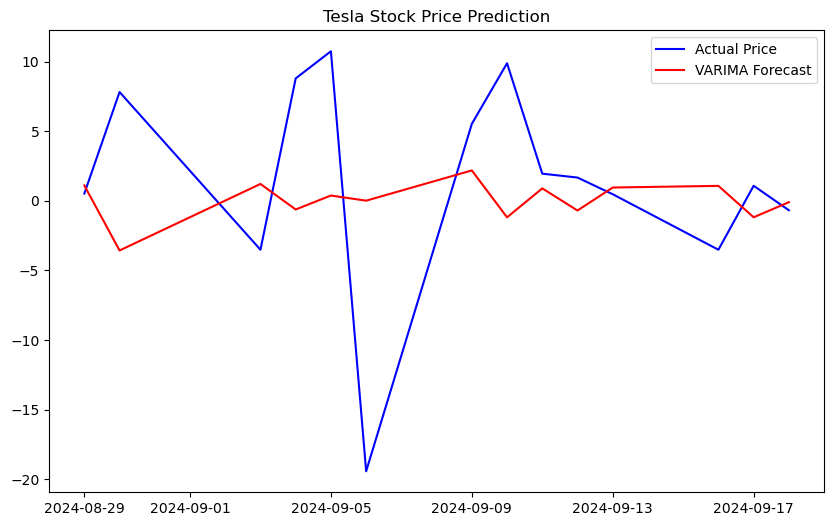

RMSE:  8.0


In [30]:
# VARIMA
model = VARMAX(train_data, order = (14,14))
result = model.fit()
predictions = result.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)
plt.figure(figsize=(10,6))
plt.plot(test_data.index, test_data['TSLA_Close'], label='Actual Price', color='blue')
plt.plot(test_data.index, predictions['TSLA_Close'], label='VARIMA Forecast', color='red')
plt.legend()
plt.title('Tesla Stock Price Prediction')
plt.show()

# evaluating model using RMSE score
rmse = round(np.sqrt(mean_squared_error(test_data['TSLA_Close'], predictions['TSLA_Close'])),2)
print('RMSE: ',rmse)

# Smoothing Methods

### Moving Average 


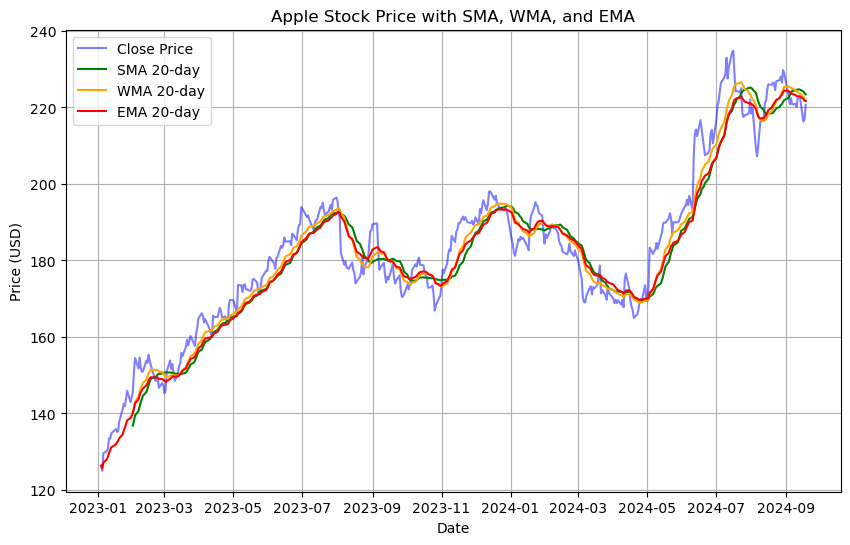

In [56]:
window_size = 20
stock_data['SMA'] = stock_data['Close'].rolling(window=window_size).mean()

# Calculate Weighted Moving Average (WMA)
weights = np.arange(1, window_size + 1)
stock_data['WMA'] = stock_data['Close'].rolling(window_size).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)

# Calculate Exponential Moving Average (EMA)
stock_data['EMA'] = stock_data['Close'].ewm(span = window_size).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA'], label=f'SMA {window_size}-day', color='green')
plt.plot(stock_data['WMA'], label=f'WMA {window_size}-day', color='orange')
plt.plot(stock_data['EMA'], label=f'EMA {window_size}-day', color='red')

plt.title('Apple Stock Price with SMA, WMA, and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

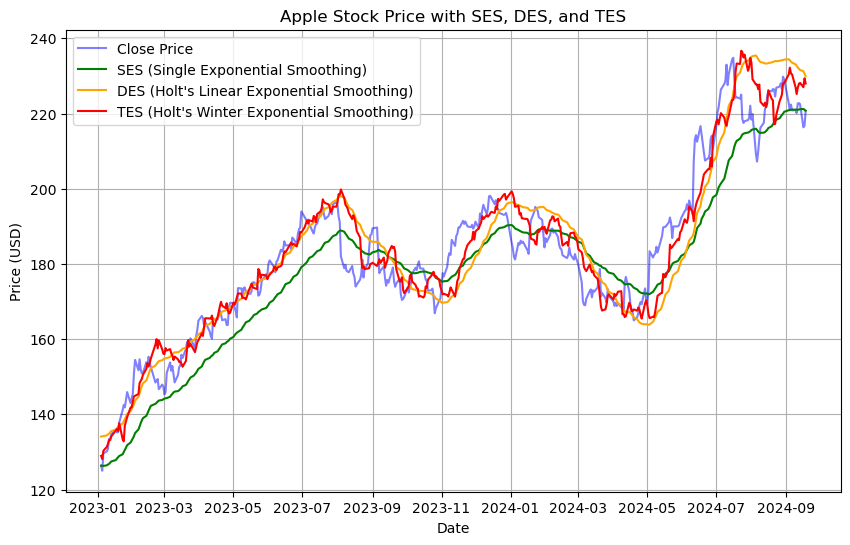

In [68]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

close_prices = stock_data['Close']
ses_model = SimpleExpSmoothing(close_prices).fit(smoothing_level=0.05)
stock_data['SES'] = ses_model.fittedvalues

# Double Exponential Smoothing (DES) - Holt's linear trend model
des_model = ExponentialSmoothing(close_prices, trend='add').fit(smoothing_level=0.05)
stock_data['DES'] = des_model.fittedvalues

# Triple Exponential Smoothing (TES) - Holt-Winters method
tes_model = ExponentialSmoothing(close_prices, trend='add', seasonal='add', seasonal_periods=12).fit(smoothing_level=0.05)
stock_data['TES'] = tes_model.fittedvalues

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(stock_data['SES'], label='SES (Single Exponential Smoothing)', color='green')
plt.plot(stock_data['DES'], label='DES (Holt\'s Linear Exponential Smoothing)', color='orange')
plt.plot(stock_data['TES'], label='TES (Holt\'s Winter Exponential Smoothing)', color='red')

plt.title('Apple Stock Price with SES, DES, and TES')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [69]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,TSLA_Close,APPL_Close,SMA,WMA,EMA,SES,DES,TES
Date,,,,,,,,,,,,,,
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.182617,89113600,113.639999,125.070000,NaN,NaN,126.360001,126.360001,134.092340,128.978797
2023-01-05,127.129997,127.769997,124.760002,125.019997,123.855095,80962700,110.339996,126.360001,NaN,NaN,125.656499,126.360001,134.193005,128.112273
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.412231,87754700,113.059998,125.019997,NaN,NaN,127.111871,126.293000,134.198704,130.330923
2023-01-09,130.470001,133.410004,129.889999,130.149994,128.937302,70790800,119.769997,129.619995,NaN,NaN,127.988930,126.459350,134.422671,131.348020
2023-01-10,130.259995,131.259995,128.119995,130.729996,129.511902,63896200,118.849998,130.149994,NaN,NaN,128.651970,126.643882,134.651258,132.138918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200,229.809998,222.660004,224.735001,223.800049,222.915114,221.060716,231.911074,227.882964
2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600,230.289993,222.770004,224.624001,223.587192,222.875580,221.146181,231.581181,228.143180
2024-09-16,216.539993,217.220001,213.919998,216.320007,216.320007,59357400,226.779999,222.500000,224.137501,222.796336,222.251239,221.213872,231.231580,226.997089


# ACF and PACF Plot

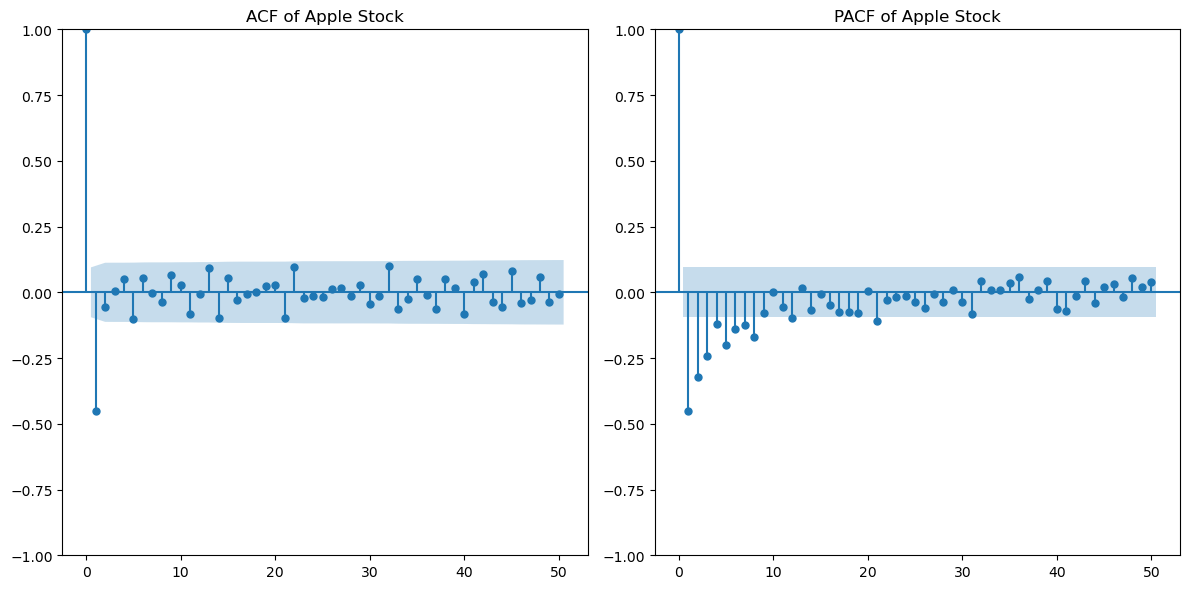

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12, 6))


# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=50)
plt.title('ACF of Apple Stock')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(stock_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=50, method='ywm')
plt.title('PACF of Apple Stock')

plt.tight_layout()
plt.show()

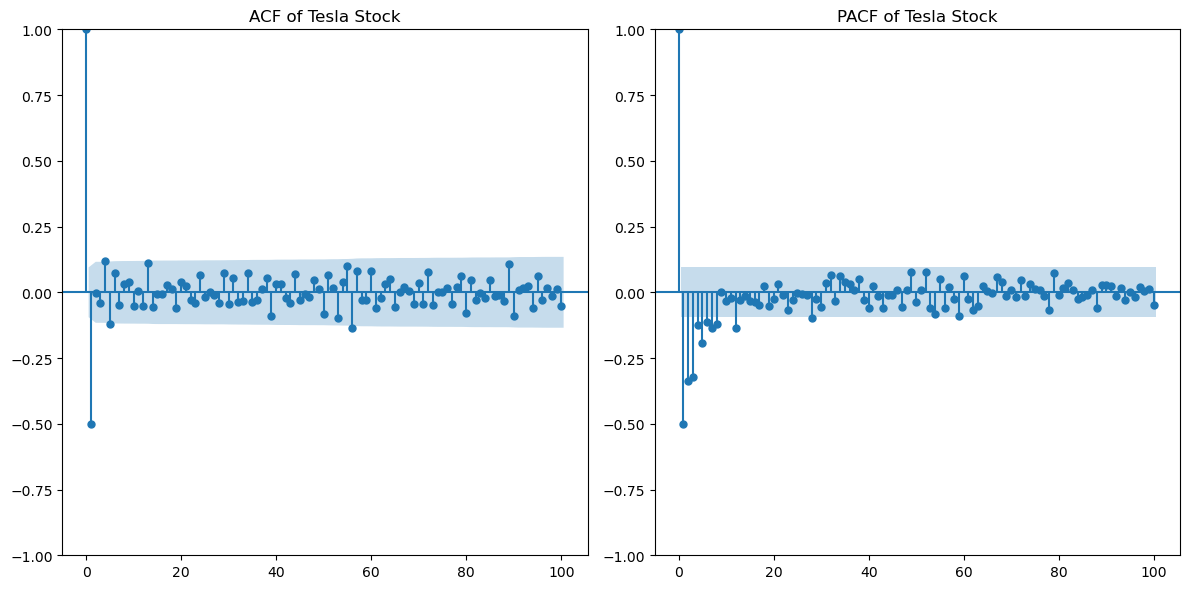

In [34]:
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(tsla_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=100)
plt.title('ACF of Tesla Stock')

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(tsla_data['Close'].diff().diff().dropna(), ax=plt.gca(), lags=100, method='ywm')
plt.title('PACF of Tesla Stock')

plt.tight_layout()
plt.show()

# Model Evaluation Metrics

In [62]:
train_data, test_data = apple_price_stationary[:-30], apple_price_stationary[-30:]


# Fit the Autoregressive model (AR) to the training data
model = AutoReg(train_data, lags = 30)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)



In [63]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# aic and bic
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criterion (AIC): {aic}')
print(f'Bayesian Information Criterion (BIC): {bic}')


Mean Absolute Error (MAE): 1.9884799785335576
Mean Squared Error (MSE): 6.31735588827799
Root Mean Squared Error (RMSE): 2.5134350773946776
Mean Absolute Percentage Error (MAPE): 170.71734340392348%
Akaike Information Criterion (AIC): 1778.9778546519321
Bayesian Information Criterion (BIC): 1904.123347261229


In [64]:
model = AutoReg(train_data, lags = 20)
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 4. Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((list(test_data) - predictions) / list(test_data))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# aic and bic
aic = model_fit.aic
bic = model_fit.bic

print(f'Akaike Information Criterion (AIC): {aic}')
print(f'Bayesian Information Criterion (BIC): {bic}')


Mean Absolute Error (MAE): 1.8049211322912497
Mean Squared Error (MSE): 5.812370740213806
Root Mean Squared Error (RMSE): 2.41088588286833
Mean Absolute Percentage Error (MAPE): 122.04966718616454%
Akaike Information Criterion (AIC): 1815.2813488857405
Bayesian Information Criterion (BIC): 1901.907145397554


# Data Preprocessing

### Handling Missing Values


In [66]:
data = {
    'Date': ['2024-01-01', '2024-01-02', '2024-01-04', '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-12'],
    'Price': [100, 101, 103, 106, 107,108,109,111],
    
}

# Create a DataFrame
data = pd.DataFrame(data)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data

,Price
Date,
2024-01-01,100
2024-01-02,101
2024-01-04,103
2024-01-07,106
2024-01-08,107
2024-01-09,108
2024-01-10,109
2024-01-12,111


In [39]:
# Create a complete date range
complete_index = pd.date_range(start='2024-01-01', end='2024-01-12', freq='D')

# Reindex the DataFrame
data = data.reindex(complete_index)

print("Reindexed DataFrame with Missing Dates:\n", data)

Reindexed DataFrame with Missing Dates:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0


### 1. Imputation

In [40]:
# Mean Imputation
mean_value = data.mean()
data_mean_imputed = data.fillna(mean_value)

# Median Imputation
median_value = data.median()
data_median_imputed = data.fillna(median_value)

# Mode Imputation
mode_value = data.mode()
data_mode_imputed = data.fillna(mode_value.values[0][0])

# Forward Fill
data_ffill = data.ffill()

# Backward Fill
data_bfill = data.bfill()

print("Original Data:\n", data)
print('----------\nMean:',mean_value.values[0])
print("----------\nMean Imputation:\n", data_mean_imputed)

print('----------\nMedian:',median_value.values[0])
print("----------\nMedian Imputation:\n", data_median_imputed)

print('----------\nMode:',mode_value.values[0][0])
print("----------\nMode Imputation:\n", data_mode_imputed)

print("----------\nForward Fill:\n", data_ffill)
print("----------\nBackward Fill:\n", data_bfill)


Original Data:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03    NaN
2024-01-04  103.0
2024-01-05    NaN
2024-01-06    NaN
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11    NaN
2024-01-12  111.0
----------
Mean: 105.625
----------
Mean Imputation:
               Price
2024-01-01  100.000
2024-01-02  101.000
2024-01-03  105.625
2024-01-04  103.000
2024-01-05  105.625
2024-01-06  105.625
2024-01-07  106.000
2024-01-08  107.000
2024-01-09  108.000
2024-01-10  109.000
2024-01-11  105.625
2024-01-12  111.000
----------
Median: 106.5
----------
Median Imputation:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  106.5
2024-01-04  103.0
2024-01-05  106.5
2024-01-06  106.5
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  106.5
2024-01-12  111.0
----------
Mode: 100.0
----------
Mode Imputation:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  100.0
2024-01-04  103.0
2024

### 2. Interpolation

In [41]:
# Linear Interpolation
data_linear_interp = data.interpolate(method='linear')

# Polynomial Interpolation (degree 2)
data_poly_interp = data.interpolate(method='polynomial', order=2)

# Spline Interpolation (order 2)
data_spline_interp = data.interpolate(method='spline', order=2)

print("\nLinear Interpolation:\n", data_linear_interp)
print("\nPolynomial Interpolation (degree 2):\n", data_poly_interp)
print("\nSpline Interpolation (order 2):\n", data_spline_interp)


Linear Interpolation:
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0

Polynomial Interpolation (degree 2):
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0

Spline Interpolation (order 2):
             Price
2024-01-01  100.0
2024-01-02  101.0
2024-01-03  102.0
2024-01-04  103.0
2024-01-05  104.0
2024-01-06  105.0
2024-01-07  106.0
2024-01-08  107.0
2024-01-09  108.0
2024-01-10  109.0
2024-01-11  110.0
2024-01-12  111.0


### 3. Predictive Modeling:

In [42]:
data['Sales'] = [700,900,1000,2000,1500,3000,2300,4000,5900,6000,65000,7000]
data

,Price,Sales
2024-01-01,100.0,700
2024-01-02,101.0,900
2024-01-03,NaN,1000
2024-01-04,103.0,2000
2024-01-05,NaN,1500
2024-01-06,NaN,3000
2024-01-07,106.0,2300
2024-01-08,107.0,4000
2024-01-09,108.0,5900
2024-01-10,109.0,6000


In [43]:
from sklearn.linear_model import LinearRegression

known_data = data.dropna(subset=['Price'])
missing_data = data[data['Price'].isna()]

# Train a model on known data
model = LinearRegression()
model.fit(known_data[['Sales']], known_data['Price'])

# Predict missing values
predicted_values = model.predict(missing_data[['Sales']])
data.loc[data['Price'].isna(), 'Price'] = predicted_values

print("\nData with Predicted Values:\n", data)


Data with Predicted Values:
                  Price  Sales
2024-01-01  100.000000    700
2024-01-02  101.000000    900
2024-01-03  101.675094   1000
2024-01-04  103.000000   2000
2024-01-05  102.434691   1500
2024-01-06  104.713483   3000
2024-01-07  106.000000   2300
2024-01-08  107.000000   4000
2024-01-09  108.000000   5900
2024-01-10  109.000000   6000
2024-01-11  198.903558  65000
2024-01-12  111.000000   7000


# Resampling

#### 1. Downsampling

In [44]:
monthly_data = stock_data['Close'].resample('M').mean()
print("\nMonthly Downsampled Data:\n", monthly_data)


Monthly Downsampled Data:
 Date
2023-01-31    136.342631
2023-02-28    150.968421
2023-03-31    154.964782
2023-04-30    165.045790
2023-05-31    172.622728
2023-06-30    184.283333
2023-07-31    192.411501
2023-08-31    181.083913
2023-09-30    177.002501
2023-10-31    174.668638
2023-11-30    185.879523
2023-12-31    194.308501
2024-01-31    187.724284
2024-02-29    184.775500
2024-03-31    172.696500
2024-04-30    169.604545
2024-05-31    186.285909
2024-06-30    206.263158
2024-07-31    224.598637
2024-08-31    221.638182
2024-09-30    220.797503
Freq: M, Name: Close, dtype: float64


#### 2. Upsampling

In [45]:
hourly_data = stock_data['Close'].resample('H').interpolate(method='linear')
print("\nHourly Upsampled Data:\n", hourly_data)


Hourly Upsampled Data:
 Date
2023-01-04 00:00:00    126.360001
2023-01-04 01:00:00    126.304167
2023-01-04 02:00:00    126.248334
2023-01-04 03:00:00    126.192500
2023-01-04 04:00:00    126.136667
                          ...    
2024-09-17 20:00:00    220.040001
2024-09-17 21:00:00    220.202501
2024-09-17 22:00:00    220.365002
2024-09-17 23:00:00    220.527502
2024-09-18 00:00:00    220.690002
Freq: H, Name: Close, Length: 14953, dtype: float64
